#DOMINANT COLOR EXTRACTION   - Project of kmeans clustering
Image Segmentation
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' colours using k means
- We can apply k-means with each pixel will reassigned to the closest of the K colors, leading to segmentation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

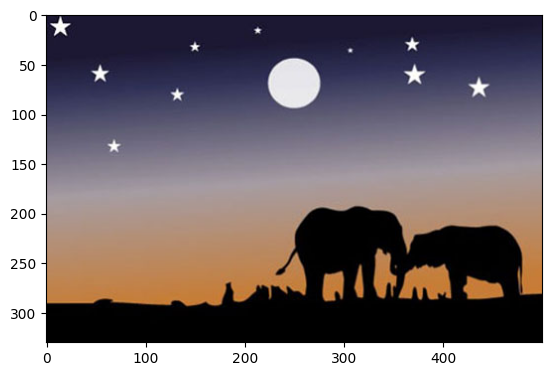

In [26]:
img = cv2.imread('elephant.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
original_img = img
plt.show()

In [27]:
print(img.shape)

(330, 500, 3)


In [28]:
# flatten each channel of img in linear aray
all_pixels = img.reshape((330*500, 3))

In [29]:
print(all_pixels.shape)

(165000, 3)


In [30]:
from sklearn.cluster import KMeans

In [31]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [32]:
centers = km.cluster_centers_

In [33]:
centers = np.array(centers, dtype='uint8')

In [34]:
print(centers)

[[ 49  46  75]
 [187 133  87]
 [151 139 146]
 [  1   1   1]]


Plot what all colors are these values

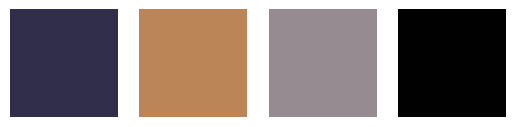

In [35]:
i =1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1

    colors.append(each_col)

    #color swatch
    a = np.zeros((100,100,3), dtype='uint8')
    a[:, :, :] = each_col
    plt.imshow(a)

plt.show()

### Segmenting our original image

In [36]:
new_img = np.zeros((330*500, 3), dtype='uint8')
print(new_img.shape)

(165000, 3)


In [37]:
a = km.labels_

In [38]:
print(len(a))
colors

165000


[array([49, 46, 75], dtype=uint8),
 array([187, 133,  87], dtype=uint8),
 array([151, 139, 146], dtype=uint8),
 array([1, 1, 1], dtype=uint8)]

In [40]:
for ix in range (new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

#print(new_img.shape)
new_img = new_img.reshape((original_img.shape))

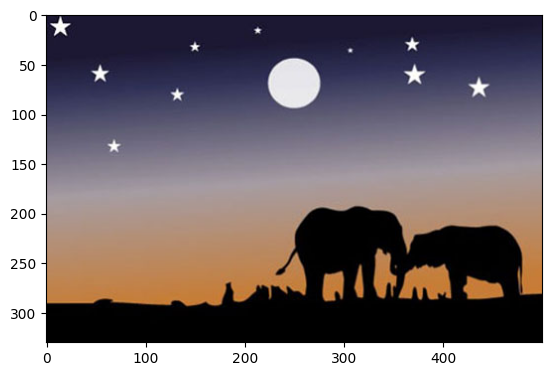

In [42]:

plt.imshow(original_img)
plt.show()

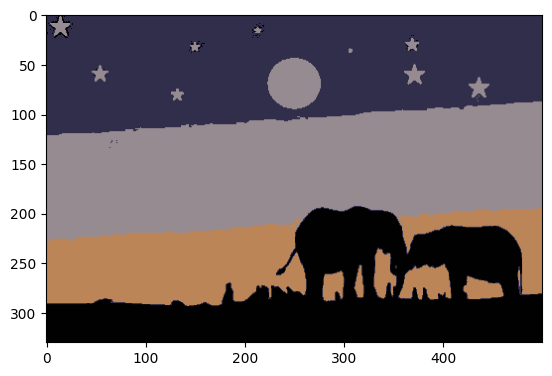

In [43]:
plt.imshow(new_img)
plt.show()